# Results

Experiment - 1 

Data Split: 70-30,      Lag: 10000,     Threshold: 1.1

| Model                   |  MAE  |  MSE  |  RMSE |   R2  | MAPE  |
|-------------------------|-------|-------|-------|-------|-------|
| General Random Forest   | 0.096 | 0.069 | 0.264 | 0.986 | 1.121 |
| Non-Peak Aware RF       | 0.309 | 0.333 | 0.577 | 0.987 | 4.084 |
| Peak-Aware RF           | 0.135 | 0.099 | 0.314 | 0.967 | 1.608 |
|                         |       |       |       |       |       |
| General Random Forest   | 0.875 | 3.820 | 1.954 | 0.257 | 10.24 |
| Non-Peak Aware RF       | 1.176 | 14.35 | 3.788 | 0.441 | 11.38 |
| Peak-Aware RF           | 0.826 | 2.713 | 1.647 | 0.098 | 9.907 |

Data Split: 70-30,      Lag: 3000,     Threshold: 1.1

| Model                   |  MAE  |  MSE  |  RMSE |   R2  | MAPE  |
|-------------------------|-------|-------|-------|-------|-------|
| General Random Forest   | 0.096 | 0.069 | 0.264 | 0.986 | 1.121 |
| Non-Peak Aware RF       | 0.121 | 0.065 | 0.256 | 0.984 | 1.410 |
| Peak-Aware RF           | 0.142 | 0.130 | 0.361 | 0.980 | 1.544 |
|                         |       |       |       |       |       |
| General Random Forest   | 0.597 | 4.624 | 2.150 | 0.101 | 6.416 |
| Non-Peak Aware RF       | 0.573 | 4.322 | 2.079 | -0.01 | 6.324 |
| Peak-Aware RF           | 0.651 | 5.599 | 2.366 | 0.180 | 6.699 |

Data Split: 50-50,      Lag: 3000,     Threshold: 1.1

| Model                   |  MAE  |  MSE  |  RMSE |   R2  | MAPE  |
|-------------------------|-------|-------|-------|-------|-------|
| General Random Forest   | 0.181 | 0.194 | 0.440 | 0.964 | 2.247 |
| Non-Peak Aware RF       | 0.149 | 0.150 | 0.388 | 0.969 | 1.810 |
| Peak-Aware RF           | 0.228 | 0.207 | 0.455 | 0.967 | 2.659 |
|                         |       |       |       |       |       |
| General Random Forest   | 0.586 | 4.756 | 2.180 | 0.137 | 6.529 |
| Non-Peak Aware RF       | 0.601 | 4.951 | 2.225 | 0.000 | 6.924 |
| Peak-Aware RF           | 0.530 | 4.303 | 2.074 | 0.316 | 5.458 |

Data Split: 50-50,      Lag: 30000,     Threshold: 1.1

| Model                   |  MAE  |  MSE  |  RMSE |   R2  | MAPE  |
|-------------------------|-------|-------|-------|-------|-------|
| General Random Forest   | 0.181 | 0.194 | 0.440 | 0.964 | 2.247 |
| Non-Peak Aware RF       | 19.43 | 425.3 | 20.62 | -10.0 | 277.2 |
| Peak-Aware RF           | 0.153 | 0.148 | 0.384 | 0.958 | 1.896 |
|                         |       |       |       |       |       |
| General Random Forest   | 0.878 | 4.118 | 2.029 | 0.253 | 10.91 |
| Non-Peak Aware RF       | 2.259 | 21.07 | 4.591 | 0.452 | 25.43 |
| Peak-Aware RF           | 0.820 | 3.147 | 1.774 | 0.081 | 10.33 |

Data Split: 30-70,      Lag: 50000,     Threshold: 1.1

| Model                   |  MAE  |  MSE  |  RMSE |   R2  | MAPE  |
|-------------------------|-------|-------|-------|-------|-------|
| General Random Forest   | 0.197 | 0.227 | 0.477 | 0.950 | 2.470 |
| Non-Peak Aware RF       | 0.216 | 0.483 | 0.694 | 0.989 | 2.030 |
| Peak-Aware RF           | 0.182 | 0.192 | 0.438 | 0.933 | 2.260 |
|                         |       |       |       |       |       |
| General Random Forest   | 0.841 | 3.320 | 1.822 | 0.275 | 10.22 |
| Non-Peak Aware RF       | 1.426 | 20.50 | 4.528 | 0.536 | 12.40 |
| Peak-Aware RF           | 0.826 | 2.606 | 1.614 | 0.124 | 10.32 |

# Code

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from dtaidistance import dtw

In [2]:
file_path = '/home/genty/Hiwi-TimeSeries/Hiwi-TimeSeries/dataset/DMC60H/AL2007_Bauteil_1/I40_Alu_Tr_Mat_1_alldata_allforces_MRR_allcurrent.csv'
df = pd.read_csv(file_path)

In [3]:
df.shape

(136351, 33)

## Functions

In [3]:
def plot_prediction(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    num_points = min(len(y_test), 10000)
    x_values = np.arange(num_points)
    plt.plot(x_values, y_test[:num_points], label='Actual Current', alpha=0.7)
    plt.plot(x_values, y_pred[:num_points], label='Predicted Current', alpha=0.5)
    plt.ylim(0, 30)  # Set y-axis limits from 0 to 30
    plt.xlabel('Index')
    plt.ylabel('Current')
    plt.title('Actual vs. Predicted Current - ' + title)
    plt.legend()
    plt.show()


In [3]:
def fit_predict(model, X_train, X_test, y_train, y_test, title):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #print(y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    #dtw_dist = dtw_distbance(y_test, y_pred)

    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    #print("Root Mean Squared Error:", np.sqrt(mse))
    print("R-squared Score:", r2)
    print("Mean Absolute Percentage Error:", mape)
    #print("DTW Distance:", dtw_dist)

    #plot_prediction(y_test, y_pred, title)
    #return y_pred
    #residual_analysis(y_test, y_pred)

## Pre-processing and Data Split

In [4]:
#df.drop('Unnamed: 0', axis=1, inplace=True)
df =df[['a_x', 'a_y', 'a_z', 'a_sp', 'v_x', 'v_y', 'v_z', 'v_sp', 'pos_x',
       'pos_y', 'pos_z', 'pos_sp', 'curr_x', 'curr_y', 'curr_z', 'curr_sp']]
X = df.drop(columns=['curr_x', 'curr_y', 'curr_z', 'curr_sp'])
y1 = df['curr_x']
y2 = df['curr_y']
y3 = df['curr_z']
y4 = df['curr_sp']
y5 = df[['curr_x', 'curr_y', 'curr_z', 'curr_sp']].abs().sum(axis=1)


In [114]:
split_index = int(0.7 * len(df))

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y5[:split_index]
y_test = y5[split_index:]

# Baseline Model

## Random Forest Regressor

Mean Absolute Error: 0.09856746646073923
Mean Squared Error: 0.07008618666960963
Root Mean Squared Error: 0.26473795849785053
R-squared Score: 0.9863864197177356
Mean Absolute Percentage Error: 1.1449509670134645


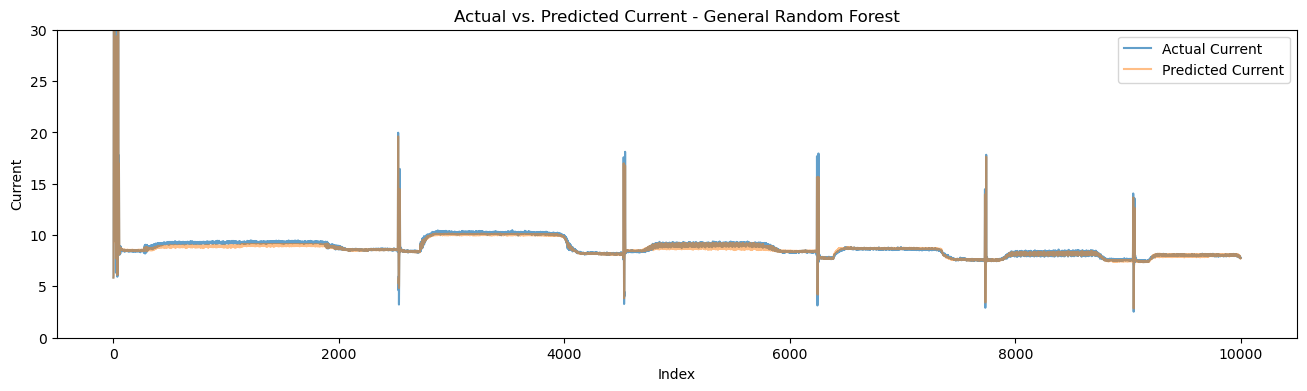

In [8]:
rf_model = RandomForestRegressor()
fit_predict(rf_model, X_train, X_test, y_train, y_test, 'General Random Forest')

### Parameter Optimization

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint


n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 5)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 4)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 40, 70, 100, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [5, 28, 52, 76, 100]}


In [16]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 12, cv = 3, verbose=2, random_state=3939, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=28; total time=  30.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=28; total time=  30.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=28; total time=  31.5s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52; total time= 1.7min
[CV] END bootstrap=True, max_depth=40, max_fe

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=12,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 40, 70, 100, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 28, 52, 76, 100]},
                   random_state=3939, verbose=2)

In [17]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

Mean Absolute Error: 0.5271995742064514
Mean Squared Error: 1.4409983433095808
Root Mean Squared Error: 1.2004159043054956
R-squared Score: -0.0974267931486188
Mean Absolute Percentage Error: 8.393717434255816


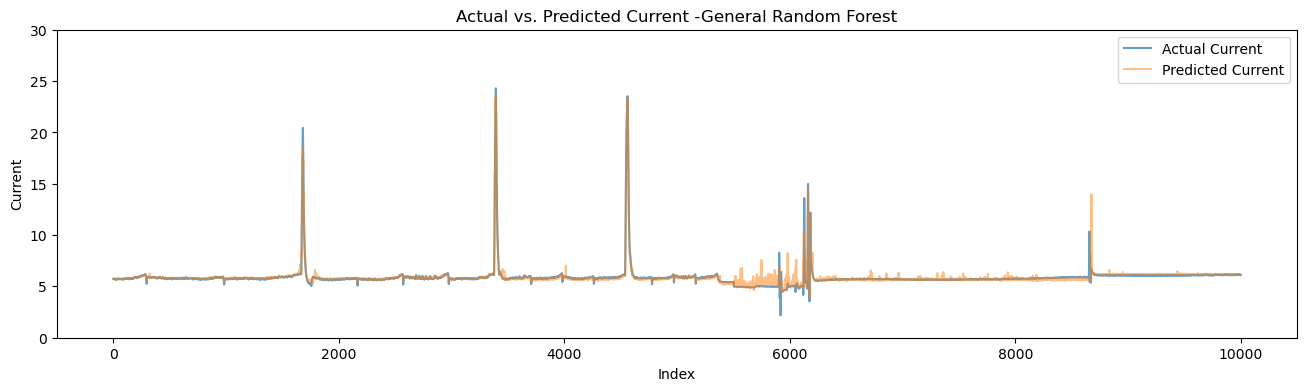

In [18]:
best_random = rf_random.best_estimator_
fit_predict(best_random, X_train, X_test, y_train, y_test, 'General Random Forest')

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [False],
    'max_depth': [35, 40, 45, 50],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2],
    'min_samples_split': [5],
    'n_estimators': [90, 100, 110, 120],
    'random_state': [3939]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [27]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version

[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=90, random_state=3939; total time= 4.3min
[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=90, random_state=3939; total time= 4.3min
[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=90, random_state=3939; total time= 4.4min
[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=3939; total time= 4.8min
[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=3939; total time= 4.9min
[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=3939; total time= 4.9min
[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samp

{'bootstrap': False,
 'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 110,
 'random_state': 3939}

Mean Absolute Error: 0.5346107777225857
Mean Squared Error: 1.4608698733669843
Root Mean Squared Error: 1.20866449992005
R-squared Score: -0.112560432688944
Mean Absolute Percentage Error: 8.520808497967082


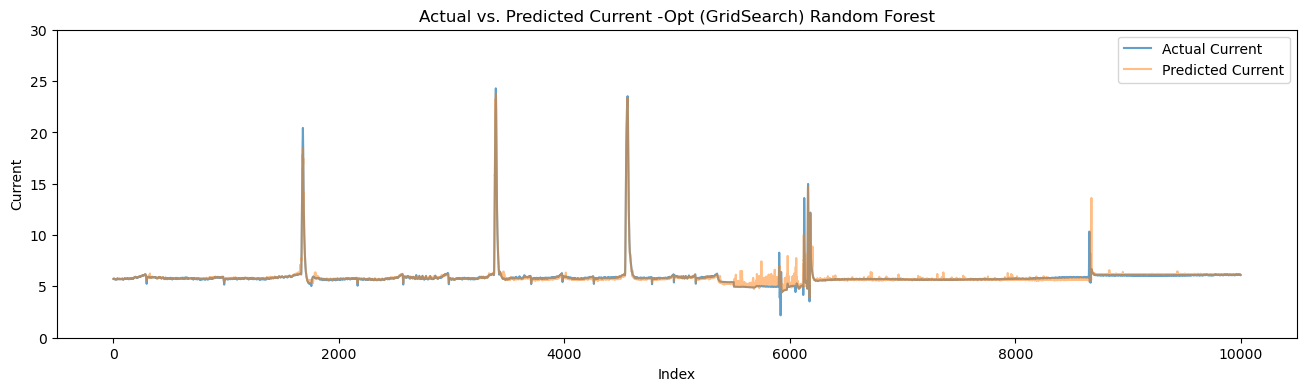

In [28]:
best_grid = grid_search.best_estimator_
fit_predict(best_grid, X_train, X_test, y_train, y_test, 'Opt (GridSearch) Random Forest')

# Peak Detection

In [7]:
def detect_peaks(y, lag, t):
    peaks = []
    threshold = np.mean(y[:lag])
    for i in range(len(y)):
        if y[i] > threshold*t:
            peaks.append(i)
        threshold = np.mean(y[i:lag+i])
    return peaks

In [6]:
def thresholding_algo(y, lag):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        threshold = np.mean(y[i:i+lag])
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = y[i] 
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

In [8]:
def get_peak_indices_by_column(dataframe, lag):
    peak_indices_by_column = {}

    for column_name in dataframe.columns:
        #result = detect_peaks(dataframe[column_name], lag, t)
        #peak_indices = [i for i in enumerate(result)]
        peak_indices_by_column[column_name] = result

    return peak_indices_by_column

In [6]:
def get_peak_indices_by_column(dataframe, lag):
    peak_indices_by_column = {}

    for column_name in dataframe.columns:
        result = thresholding_algo(dataframe[column_name], lag)
        peak_indices = [i for i, signal in enumerate(result['signals']) if signal != 0]
        peak_indices_by_column[column_name] = peak_indices

    return peak_indices_by_column

In [7]:
import itertools

def find_common_peaks(peaks_df):
    common_peaks = []
    
    columns = peaks_df['Column_Name'].tolist()
    columns.remove('Current')
    column_combinations = [(column, 'Current') for column in columns]   

    for pair in column_combinations:
        column1_peaks = set(peaks_df.loc[peaks_df['Column_Name'] == pair[0], 'Peak_Indices'].iloc[0])
        column2_peaks = set(peaks_df.loc[peaks_df['Column_Name'] == pair[1], 'Peak_Indices'].iloc[0])
        
        common_indices = list(column1_peaks.intersection(column2_peaks))
        num_common_peaks = len(common_indices)
        
        common_peaks.append({'feature_pair': pair, 'num_peaks': num_common_peaks, 'lag':peaks_df['Lag'].iloc[0],'peak_indices': common_indices,})
    
    return pd.DataFrame(common_peaks)

In [11]:
def plot_common_peaks(df, common_peaks_df, lag):
    for index, row in common_peaks_df.iterrows():
        pair = row['feature_pair']
        common_indices = sorted(row['peak_indices'])
        
        values_column1 = []
        index_column = []
        values_column2 = []
        
        for index_value in common_indices:
            # Extract values for both columns from 10 indices before and after the common index
            values_column1.extend(df.loc[index_value - 10:index_value + 10, pair[0]].tolist())
            values_column2.extend(df.loc[index_value - 10:index_value + 10, pair[1]].tolist())
            if index_value > 10:
                index_column.extend(list(range(index_value - 10, index_value + 11)))
                
        #values_column1 = (values_column1 - np.min(values_column1)) / (np.max(values_column1) - np.min(values_column1))
        #values_column2 = (values_column2 - np.min(values_column2)) / (np.max(values_column2) - np.min(values_column2))
        values_column1 = [(value - np.min(values_column1)) / (np.max(values_column1) - np.min(values_column1)) for value in values_column1]
        values_column2 = [(value - np.min(values_column2)) / (np.max(values_column2) - np.min(values_column2)) * (2 - 1) + 1 for value in values_column2]
        plt.figure(figsize=(12, 4))
        plt.plot(index_column, values_column1, label=pair[0])
        plt.plot(index_column, values_column2, label=pair[1])
    
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Common Peaks --' + str(row['num_peaks']) +' (Lag = ' + str(lag) + ')')
        plt.legend()
        plt.show()


In [8]:
def get_output_peaks(df, lag):  
    peak_info = get_peak_indices_by_column(df, lag)
    peaks_df = pd.DataFrame({'Column_Name': list(peak_info.keys()), 
                                'Peak_Indices': list(peak_info.values())})
    peaks_df['Num_Peaks'] = peaks_df['Peak_Indices'].apply(len)
    peaks_df['Lag'] = lag
    #peaks_df['Threshold'] = t
    peaks_df = peaks_df[~peaks_df['Column_Name'].str.startswith('Power')]
    #print(peaks_df.head(10))

    common_peaks_df = find_common_peaks(peaks_df)
    #plot_common_peaks(df, common_peaks_df, lag, t)
    #print(common_peaks_df)

    return common_peaks_df


In [15]:
df_p = pd.DataFrame()
X.loc[:, 'Current'] = y1
lag = [10000]
for lag_val in lag:
    com_pk_df = get_output_peaks(X, lag_val)
    df_p = df_p.append(com_pk_df)

import os
output_folder = '/home/genty/Hiwi-TimeSeries/Hiwi-TimeSeries/output/thresholdingalgo/'

filename = os.path.join(output_folder, f'common_peaks_ex1_y1.csv')
df_p.to_csv(filename, index=False)

### Peaks in the training data

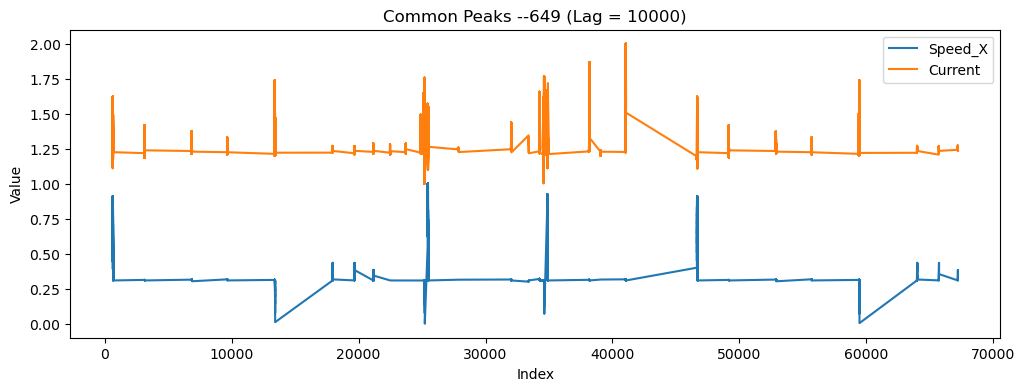

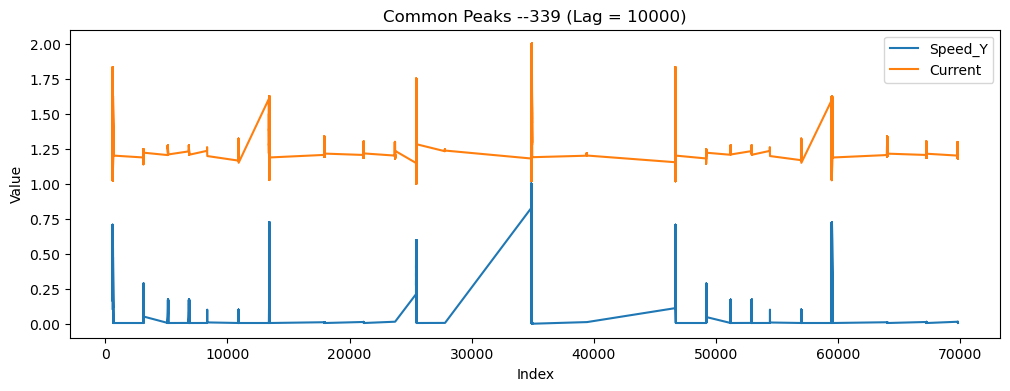

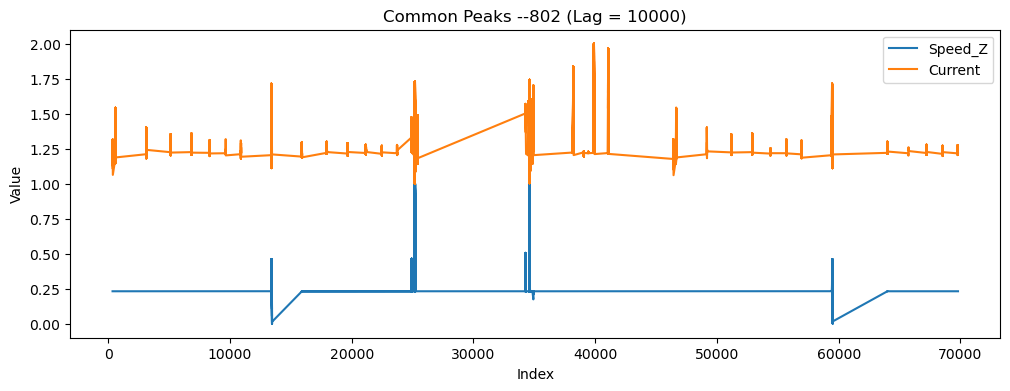

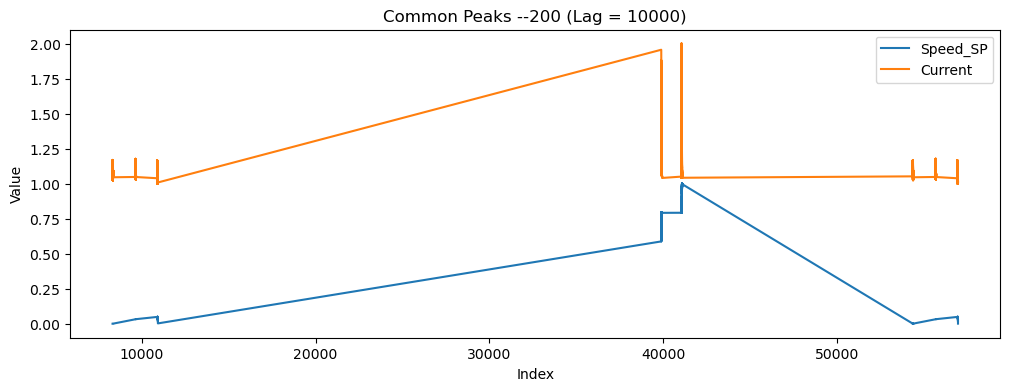

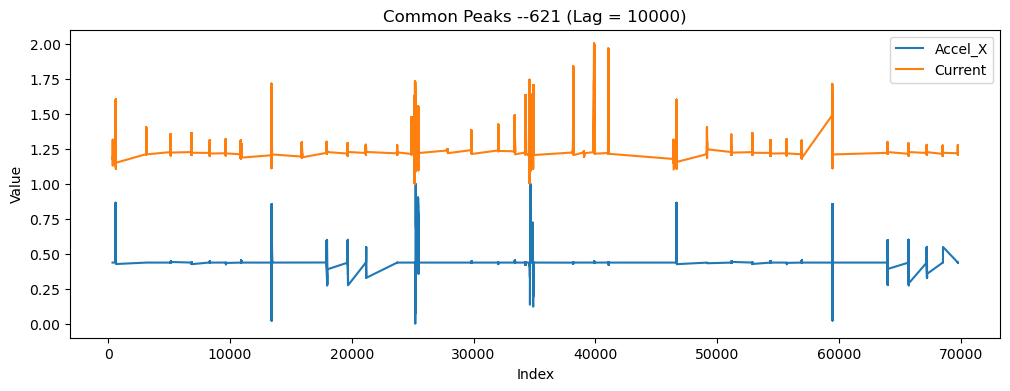

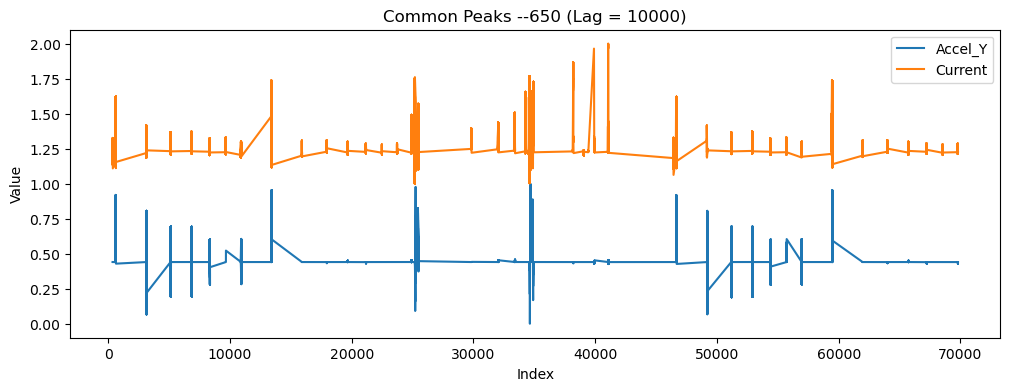

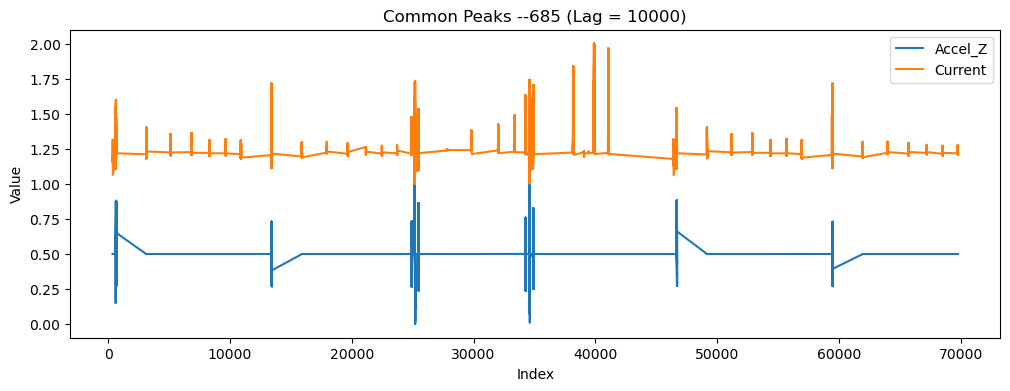

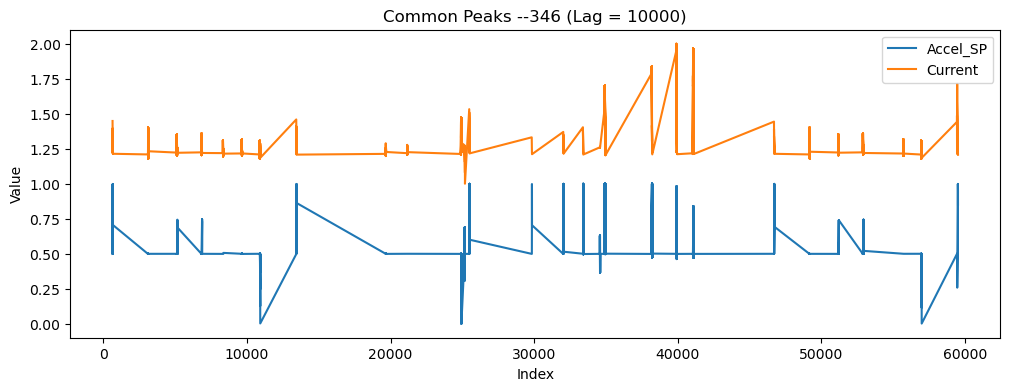

Currently on lag: 10000


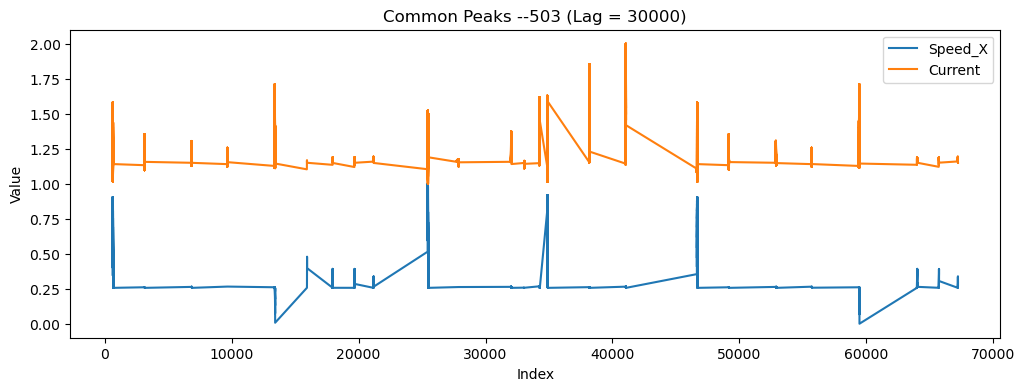

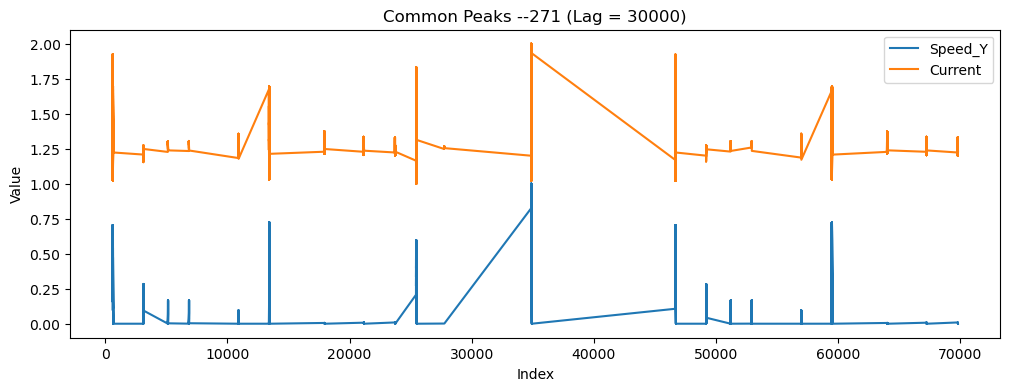

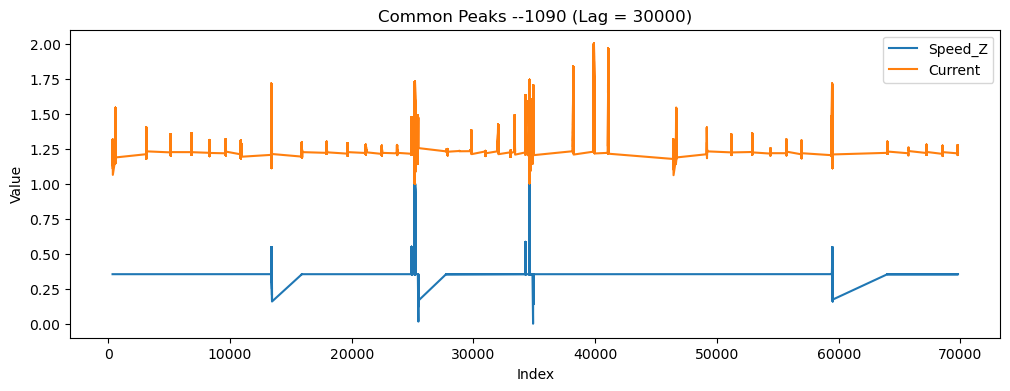

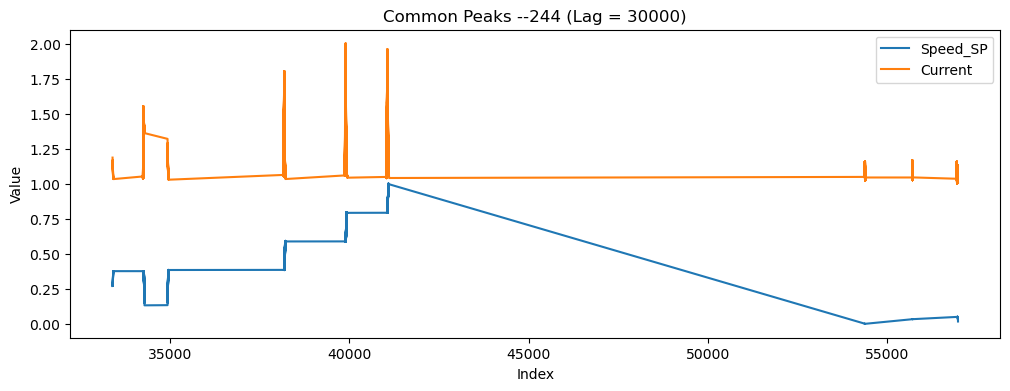

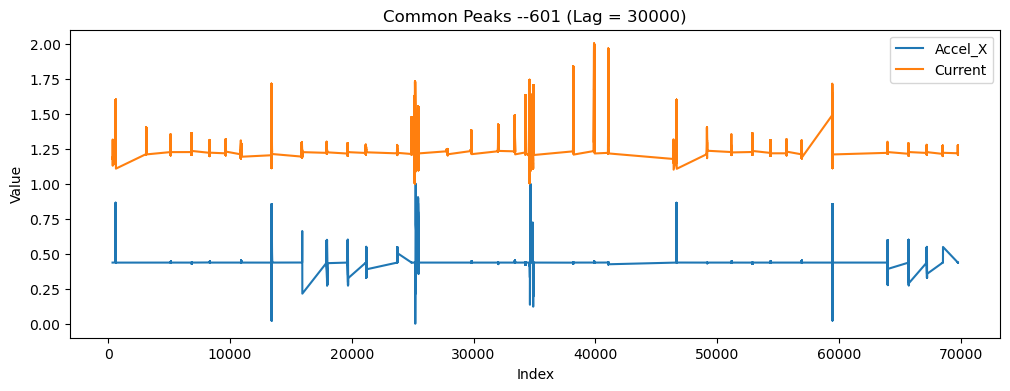

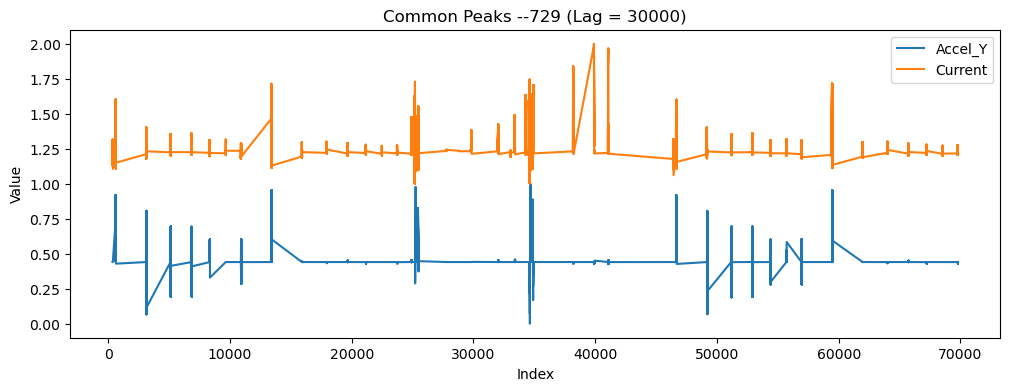

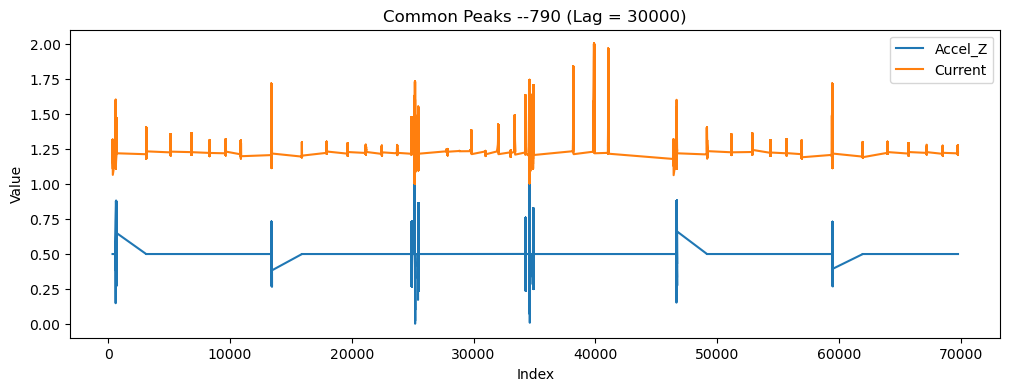

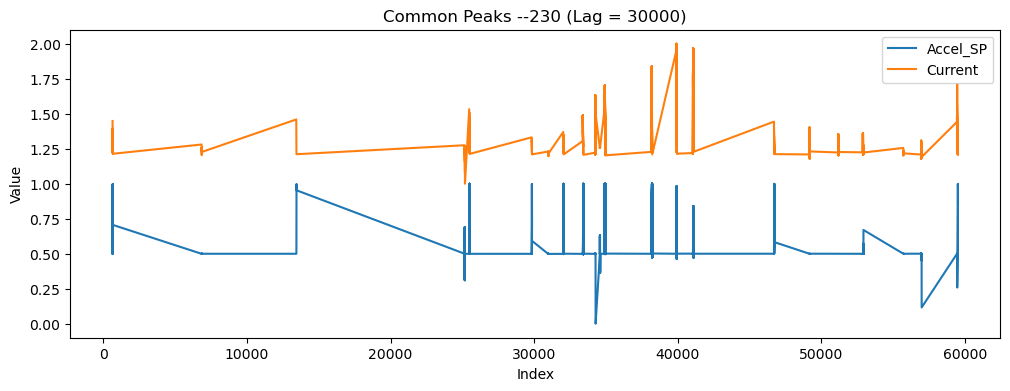

Currently on lag: 30000


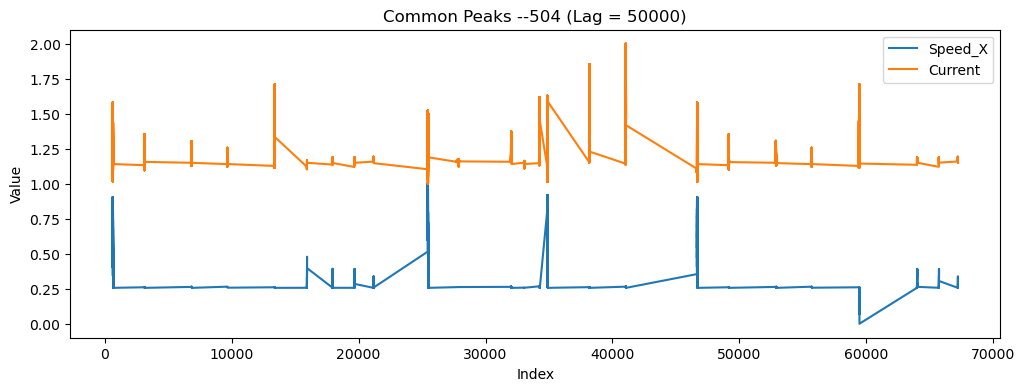

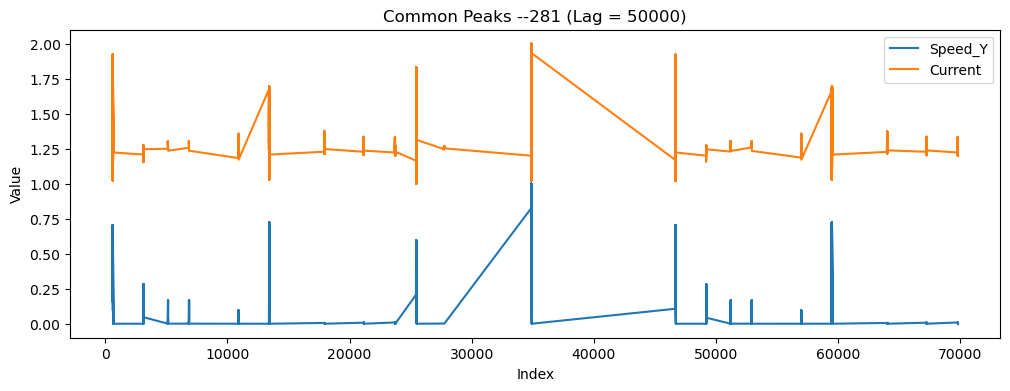

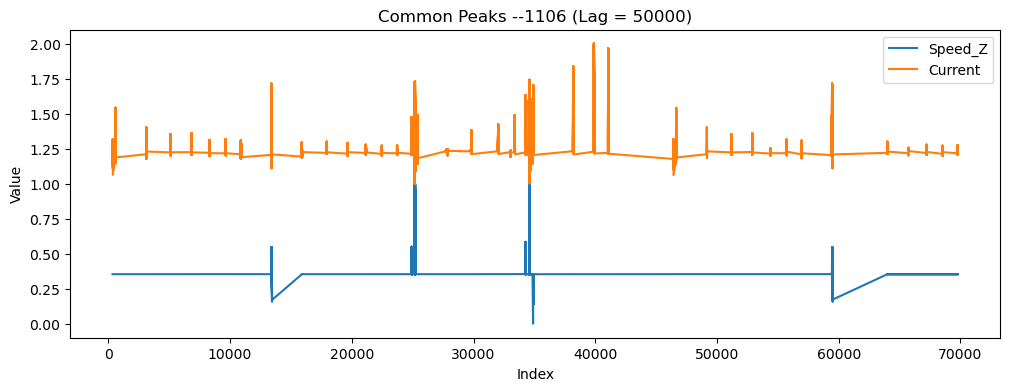

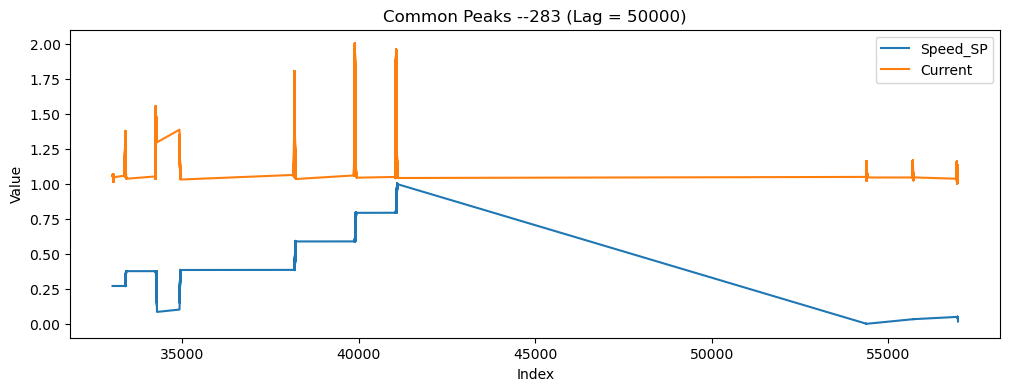

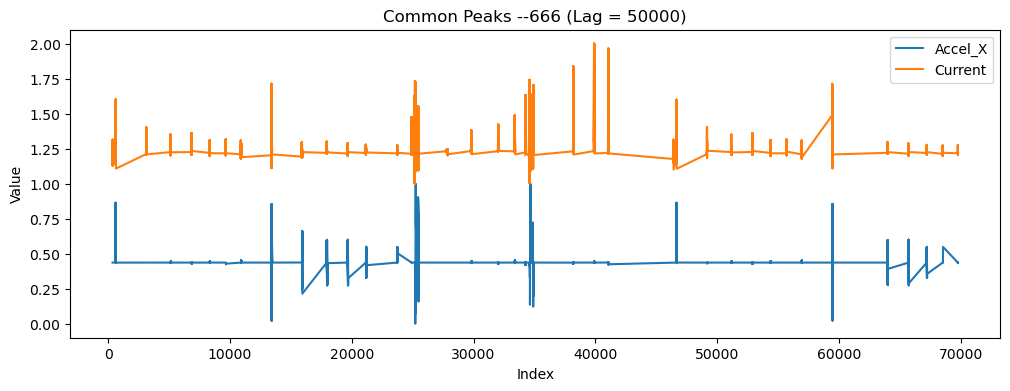

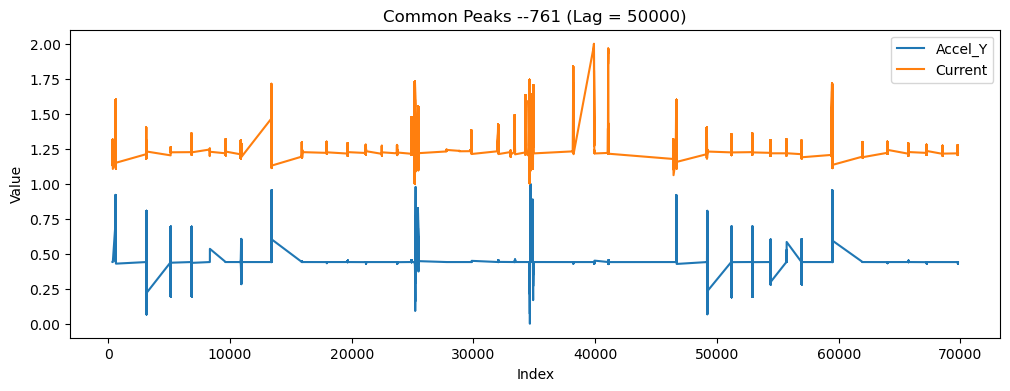

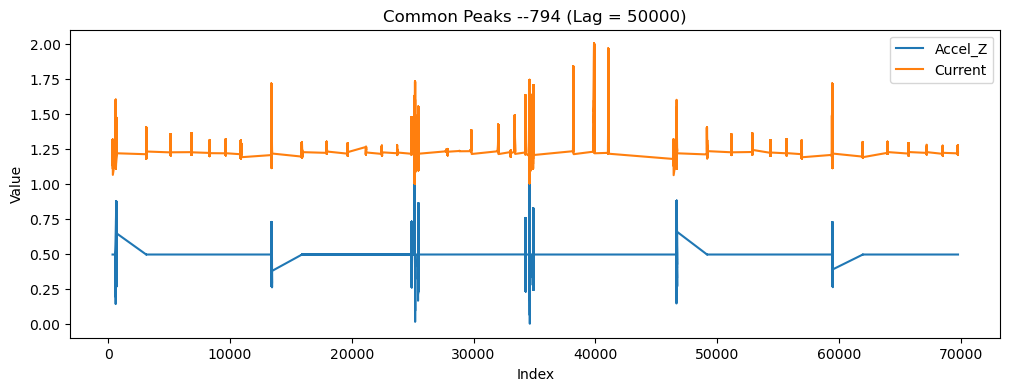

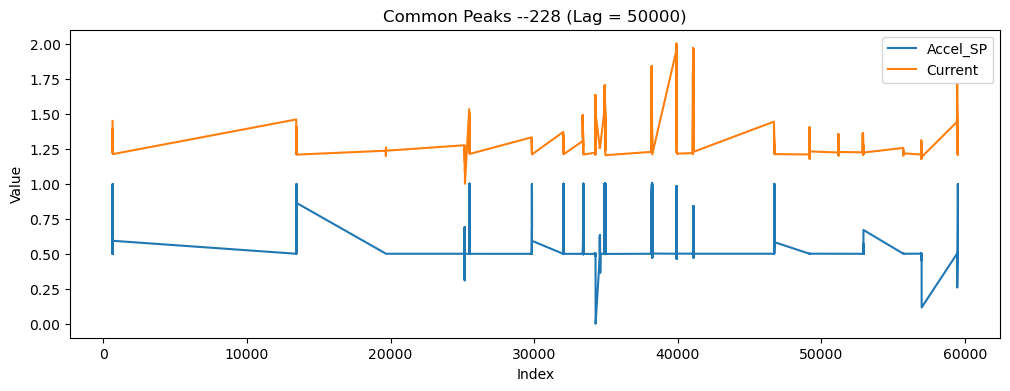

Currently on lag: 50000


In [49]:
X_train.loc[:, 'Current'] = y_train
lag = [10000, 30000, 50000]
for lag_val in lag:
    get_output_peaks(X_train, lag_val)


# Peak Aware Model

We have chosen lag = 10000 and influence = 0.1 as the parameters for the peak detection methods. Based on this, separate peaks and non-peaks into two different dfs.

In [32]:
peak_info = pd.read_csv('/home/genty/Hiwi-TimeSeries/Hiwi-TimeSeries/output/thresholdingalgo/common_peaks_ex1_y5.csv')
print(peak_info)

                          feature_pair  num_peaks    lag  \
0                   ('a_x', 'Current')        365  10000   
1                   ('a_y', 'Current')        371  10000   
2                   ('a_z', 'Current')        454  10000   
3                  ('a_sp', 'Current')         12  10000   
4                   ('v_x', 'Current')        406  10000   
5                   ('v_y', 'Current')        263  10000   
6                   ('v_z', 'Current')        461  10000   
7                  ('v_sp', 'Current')         19  10000   
8                 ('pos_x', 'Current')        400  10000   
9                 ('pos_y', 'Current')          0  10000   
10                ('pos_z', 'Current')          9  10000   
11               ('pos_sp', 'Current')          0  10000   
12              ('f_x_sim', 'Current')        274  10000   
13              ('f_y_sim', 'Current')        303  10000   
14              ('f_z_sim', 'Current')          0  10000   
15             ('f_sp_sim', 'Current')  

In [33]:
max_peaks = peak_info[peak_info['num_peaks'] == peak_info['num_peaks'].max()]
print(max_peaks)

         feature_pair  num_peaks    lag  \
6  ('v_z', 'Current')        461  10000   

                                        peak_indices  
6  [39909, 24703, 24704, 24705, 24706, 24707, 247...  


Check if many features have common peaks or only one.

In [34]:
peak_indices_lists = max_peaks['peak_indices'].tolist()
all_indices_same = all(peak_indices == peak_indices_lists[0] for peak_indices in peak_indices_lists)
same = 0
if all_indices_same:
    same = 1
    print("All peak indices are the same across all rows.")
else:
    print("Peak indices are not the same across all rows.")


All peak indices are the same across all rows.


Based on that, create two dfs for peaks and non-peaks considering the selected feature(s).

In [35]:
column_name = eval(max_peaks['feature_pair'].iloc[0])[0]
lag = max_peaks['lag'].squeeze()
#thresh = max_peaks['thresh'].squeeze()

In [19]:
def create_train_test_split(X_train, y_train, X_test, y_test, column_name, lag):
    result = thresholding_algo(X_train[column_name], lag)
    peak_indices_train = [i for i, signal in enumerate(result['signals']) if signal != 0]
    #result = detect_peaks(X_train[column_name], lag, thresh)
    #peak_indices_train = result

    X_train_peak = X_train.loc[peak_indices_train]
    y_train_peak = y_train.loc[peak_indices_train]
    X_train_non_peak = X_train.drop(peak_indices_train)
    y_train_non_peak = y_train.drop(peak_indices_train)

    #Find peaks and non-peaks in test data
    X_test = X_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    result = thresholding_algo(X_test[column_name], lag)
    peak_indices_test = [i for i, signal in enumerate(result['signals']) if signal != 0]
    #result = detect_peaks(X_test[column_name], lag, thresh)
    #peak_indices_test = result

    X_test_peak = X_test.loc[peak_indices_test]
    y_test_peak = y_test.loc[peak_indices_test]
    X_test_non_peak = X_test.drop(peak_indices_test)
    y_test_non_peak = y_test.drop(peak_indices_test)

    return X_train_peak, y_train_peak, X_train_non_peak, y_train_non_peak, X_test_peak, y_test_peak, X_test_non_peak, y_test_non_peak

In [20]:
df2 = pd.read_csv('/home/genty/Hiwi-TimeSeries/Hiwi-TimeSeries/dataset/DMC60H/AL2007_Bauteil_2/I40_Alu_Val_Mat_1_alldata_allforces_MRR_allcurrent.csv')
df3 = pd.read_csv('/home/genty/Hiwi-TimeSeries/Hiwi-TimeSeries/dataset/DMC60H/S235JR_Bauteil_1/I40_St_Tr_Mat_1_alldata_allforces_MRR_allcurrent.csv')
df4 = pd.read_csv('/home/genty/Hiwi-TimeSeries/Hiwi-TimeSeries/dataset/DMC60H/S235JR_Bauteil_2/I40_St_Val_Mat_1_alldata_allforces_MRR_allcurrent.csv')


In [21]:
df2 = df2[['a_x', 'a_y', 'a_z', 'a_sp', 'v_x', 'v_y', 'v_z', 'v_sp', 'pos_x',
       'pos_y', 'pos_z', 'pos_sp', 'curr_x', 'curr_y', 'curr_z', 'curr_sp']]
df3 = df3[['a_x', 'a_y', 'a_z', 'a_sp', 'v_x', 'v_y', 'v_z', 'v_sp', 'pos_x',
       'pos_y', 'pos_z', 'pos_sp','curr_x', 'curr_y', 'curr_z', 'curr_sp']]
df4 = df4[['a_x', 'a_y', 'a_z', 'a_sp', 'v_x', 'v_y', 'v_z', 'v_sp', 'pos_x',
       'pos_y', 'pos_z', 'pos_sp','curr_x', 'curr_y', 'curr_z', 'curr_sp']]

In [22]:
X_test_df2 = df2.drop(columns=['curr_x', 'curr_y', 'curr_z', 'curr_sp'])
y1_test_df2 = df2['curr_x']
y2_test_df2 = df2['curr_y']
y3_test_df2 = df2['curr_z']
y4_test_df2 = df2['curr_sp']
y5_test_df2 = df2[['curr_x', 'curr_y', 'curr_z', 'curr_sp']].abs().sum(axis=1)

X_test_df3 = df3.drop(columns=['curr_x', 'curr_y', 'curr_z', 'curr_sp'])
y1_test_df3 = df3['curr_x']
y2_test_df3 = df3['curr_y']
y3_test_df3 = df3['curr_z']
y4_test_df3 = df3['curr_sp']
y5_test_df3 = df3[['curr_x', 'curr_y', 'curr_z', 'curr_sp']].abs().sum(axis=1)

X_test_df4 = df4.drop(columns=['curr_x', 'curr_y', 'curr_z', 'curr_sp'])
y1_test_df4 = df4['curr_x']
y2_test_df4 = df4['curr_y']
y3_test_df4 = df4['curr_z']
y4_test_df4 = df4['curr_sp']
y5_test_df4 = df4[['curr_x', 'curr_y', 'curr_z', 'curr_sp']].abs().sum(axis=1)

## Whole dataset using column with Max Common Peaks

In [42]:
#X_train = X_train.drop(columns=['Current'])
X_train_peak, y_train_peak, X_train_non_peak, y_train_non_peak, X_test_peak, y_test_peak, X_test_non_peak, y_test_non_peak = create_train_test_split(X, y5, X_test_df2, y5_test_df2, column_name, lag)

Build and train a Random Forest Regressor and Neural Network model for non-peak data

In [43]:
fit_predict(rf_model, X_train_non_peak, X_test_non_peak, y_train_non_peak, y_test_non_peak, 'Random Forest Non-Peak on '+ column_name)

Mean Absolute Error: 1.681604677946512
Mean Squared Error: 8.03749132561327
R-squared Score: -0.06801480808400862
Mean Absolute Percentage Error: 21.680196744407944


Build and train a RF and NN model for peak data

In [44]:
fit_predict(rf_model, X_train_peak, X_test_peak, y_train_peak, y_test_peak, 'Random Forest Peak on '+ column_name)

Mean Absolute Error: 1.530428568298369
Mean Squared Error: 5.767916368119542
R-squared Score: 0.9255243846028218
Mean Absolute Percentage Error: 17.078611713090865


### Data Split: 70-30,      Lag: 10000

| Model                   |  MAE  |  MSE  |  RMSE |   R2  | MAPE  |
|-------------------------|-------|-------|-------|-------|-------|
| General Random Forest   | 0.096 | 0.069 | 0.264 | 0.986 | 1.121 |
| Non-Peak Aware RF       | 0.202 | 0.108 | 0.328 | 0.950 | 2.266 |
| Peak-Aware RF           | 0.079 | 0.073 | 0.271 | 0.987 | 0.951 |

### Data Split: 70-30,      Lag: 5000

| Model                   |  MAE  |  MSE  |  RMSE |   R2  | MAPE  |
|-------------------------|-------|-------|-------|-------|-------|
| General Random Forest   | 0.096 | 0.069 | 0.264 | 0.986 | 1.121 |
| Non-Peak Aware RF       | 0.272 | 0.201 | 0.448 | 0.940 | 2.795 |
| Peak-Aware RF           | 0.100 | 0.073 | 0.271 | 0.986 | 1.201 |

### Data Split: 50-50,      Lag: 1000

| Model                   |  MAE  |  MSE  |  RMSE |   R2  | MAPE  |
|-------------------------|-------|-------|-------|-------|-------|
| General Random Forest   | 0.177 | 0.189 | 0.435 | 0.965 | 2.197 |
| Non-Peak Aware RF       | 0.305 | 1.311 | 1.145 | 0.787 | 3.578 |
| Peak-Aware RF           | 0.185 | 0.212 | 0.460 | 0.961 | 2.307 |



## Without using Global Models

Mean Absolute Error: 0.1344929139629247
Mean Squared Error: 0.13999532490116048
Root Mean Squared Error: 0.3741594912616283
R-squared Score: 0.9945508150255347
Mean Absolute Percentage Error: 1.4392591795225411


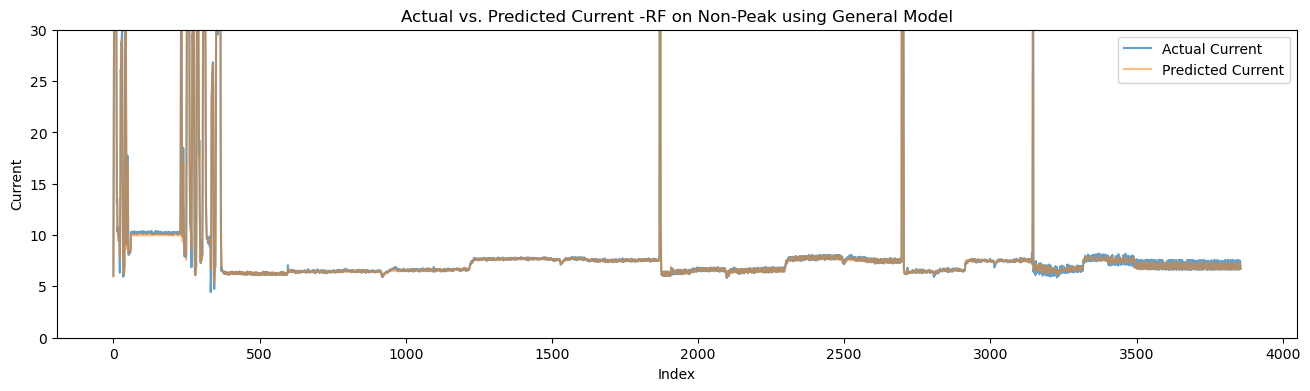

In [43]:
fit_predict(rf_model, X_train, X_test_non_peak, y_train, y_test_non_peak, 'RF on Non-Peak using General Model')

General model for non-peak data and Peak-aware model for peak data

| Model                   |  MAE  |  MSE  |  RMSE |   R2  | MAPE  |
|-------------------------|-------|-------|-------|-------|-------|
| General Random Forest   | 0.101 | 0.195 | 0.442 | 0.800 | 1.586 |
| General Neural Network  | 0.269 | 0.782 | 0.884 | 0.199 | 3.975 |
|                         |       |       |       |       |       |
| Gen Non-Peak RF         | 0.092 | 0.186 | 0.431 | 0.798 | 1.463 |
| Gen Non-Peak NN         | 0.240 | 0.722 | 0.850 | 0.219 | 3.653 |
|                         |       |       |       |       |       |
| Peak-Aware RF           | 0.108 | 0.191 | 0.437 | 0.841 | 1.720 |
| Peak-Aware NN           | 0.267 | 0.905 | 0.951 | 0.250 | 3.829 |

## Using only one feature as dataset

In [154]:
X_train_f1 = X_train[[column_name]].copy()
X_test_f1 = X_test[[column_name]].copy()

X_train_peak_f1, y_train_peak_f1, X_train_non_peak_f1, y_train_non_peak_f1, X_test_peak_f1, y_test_peak_f1, X_test_non_peak_f1, y_test_non_peak_f1 = create_train_test_split(X_train_f1, y_train, X_test_f1, y_test, column_name)

Mean Absolute Error: 0.8416786484045486
Mean Squared Error: 3.3208746050952804
Root Mean Squared Error: 1.822326700977429
R-squared Score: 0.2759616346089142
Mean Absolute Percentage Error: 10.227668620635148


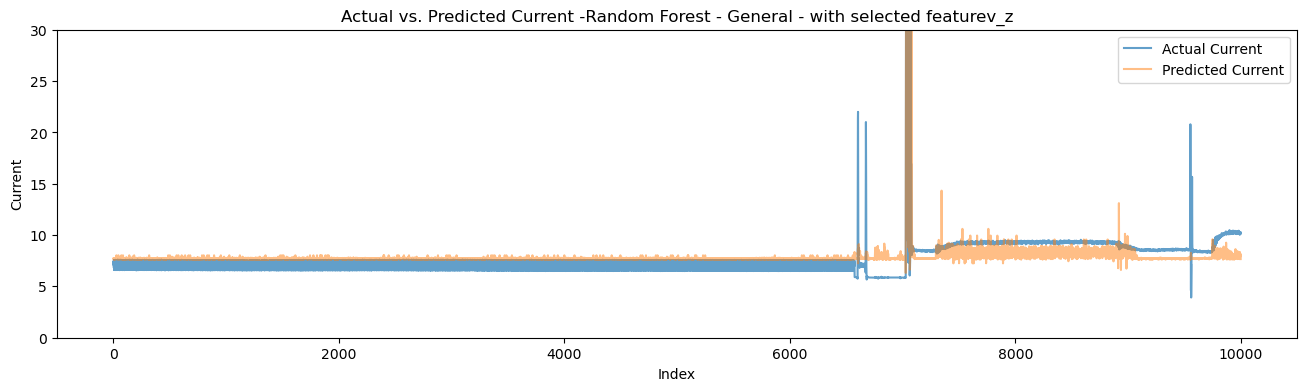

In [155]:
fit_predict(rf_model, X_train_f1, X_test_f1, y_train, y_test, 'Random Forest - General - with selected feature' + column_name)

Mean Absolute Error: 1.4269496772654433
Mean Squared Error: 20.504880612063662
Root Mean Squared Error: 4.528231510431381
R-squared Score: 0.5361267422346855
Mean Absolute Percentage Error: 12.40603869395881


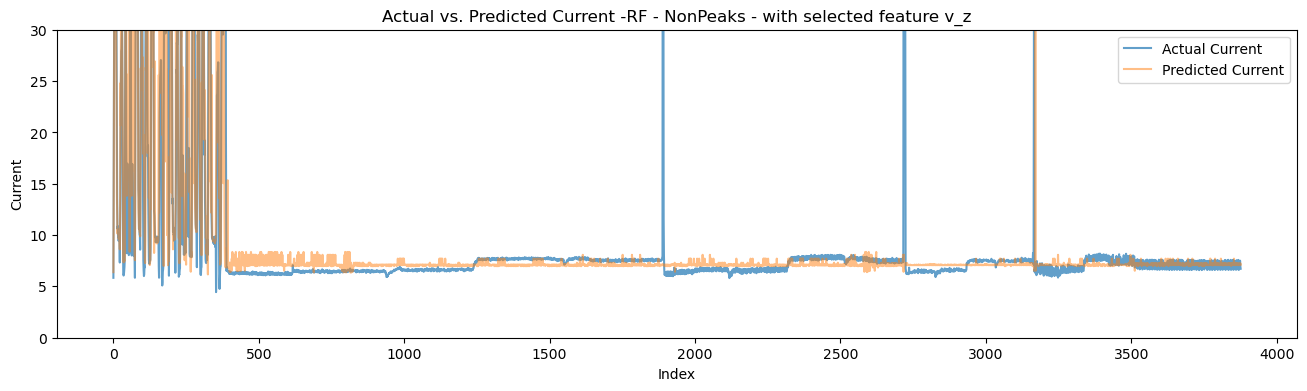

In [156]:
fit_predict(rf_model, X_train_non_peak_f1, X_test_non_peak_f1, y_train_non_peak_f1, y_test_non_peak_f1, 'RF - NonPeaks - with selected feature ' + column_name)

Mean Absolute Error: 0.8268732872550844
Mean Squared Error: 2.6065519813138827
Root Mean Squared Error: 1.6144819544714282
R-squared Score: 0.09826795737875915
Mean Absolute Percentage Error: 10.324127681744088


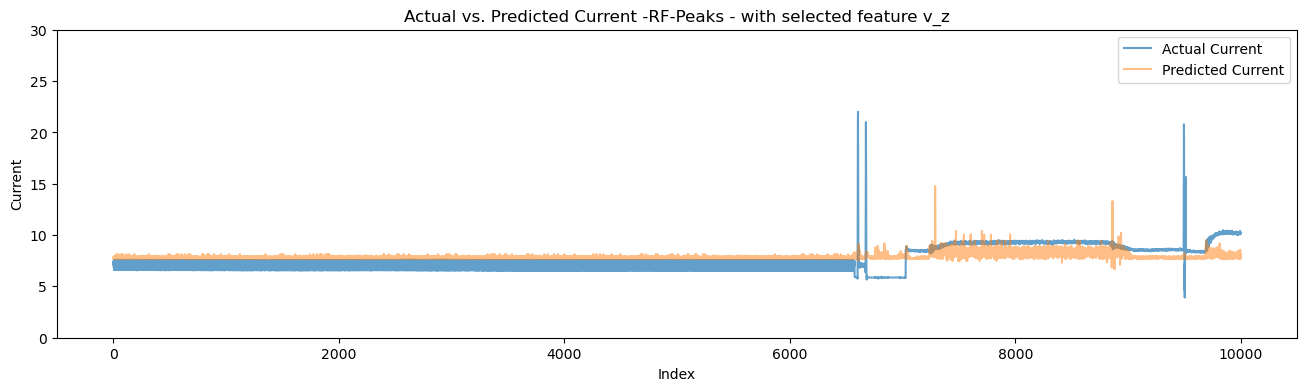

In [163]:
fit_predict(rf_model, X_train_peak_f1, X_test_peak_f1, y_train_peak_f1, y_test_peak_f1, 'RF-Peaks - with selected feature ' + column_name)

# LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
2024-06-18 20:40:04.476523: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 20:40:04.483796: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 20:40:04.536415: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 20:40:05.360604: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find Tensor

In [2]:
file_path = '/home/genty/Hiwi-TimeSeries/Hiwi-TimeSeries/dataset/DMC60H/AL2007_Bauteil_1/I40_Alu_Tr_Mat_1_alldata_allforces_MRR_allcurrent.csv'
data = pd.read_csv(file_path)

In [3]:
#df.drop('Unnamed: 0', axis=1, inplace=True)
data =data[['a_x', 'a_y', 'a_z', 'a_sp', 'v_x', 'v_y', 'v_z', 'v_sp', 'pos_x',
       'pos_y', 'pos_z', 'pos_sp', 'curr_x', 'curr_y', 'curr_z', 'curr_sp']]
X = data.drop(columns=['curr_x', 'curr_y', 'curr_z', 'curr_sp'])
y1 = data['curr_x']
y2 = data['curr_y']
y3 = data['curr_z']
y4 = data['curr_sp']
y5 = data[['curr_x', 'curr_y', 'curr_z', 'curr_sp']].abs().sum(axis=1)
y = data[['curr_x', 'curr_y', 'curr_z', 'curr_sp']]

In [4]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_X = scaler_X.fit_transform(X)
scaled_y = scaler_y.fit_transform(y)

In [5]:
train_size = int(len(scaled_X) * 0.7)
test_size = len(scaled_X) - train_size
X_train, X_test = scaled_X[:train_size], scaled_X[train_size:]
y_train, y_test = scaled_y[:train_size], scaled_y[train_size:]

In [6]:
def create_dataset(X, y, time_step=60):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

In [7]:
time_step = 60
X_train, y_train = create_dataset(X_train, y_train, time_step)
X_test, y_test = create_dataset(X_test, y_test, time_step)

In [8]:
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(4))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

In [9]:
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_model(input_shape)

/home/genty/.local/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
class R2Callback(Callback):
    def __init__(self, validation_data):
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        X_val, y_val = self.validation_data
        y_pred = self.model.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        logs['val_r2'] = r2
        print(f' - val_r2: {r2:.4f}')

In [11]:
# Early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_r2', patience=10, mode='max', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_r2', factor=0.2, patience=5, mode='max', min_lr=0.0001)
r2_callback = R2Callback(validation_data=(X_test, y_test))

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[r2_callback, early_stop, reduce_lr])

# Make Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual values
train_predict = scaler_y.inverse_transform(train_predict)
test_predict = scaler_y.inverse_transform(test_predict)
y_train = scaler_y.inverse_transform(y_train)
y_test = scaler_y.inverse_transform(y_test)

# Calculate and Print Metrics
def calculate_metrics(true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predicted_values)
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    return mse, rmse, r2, mape

# Calculate metrics for training and test data
train_mse, train_rmse, train_r2, train_mape = calculate_metrics(y_train, train_predict)
test_mse, test_rmse, test_r2, test_mape = calculate_metrics(y_test, test_predict)

# Print the metrics
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R2: {train_r2}")
print(f"Train MAPE: {train_mape}%")

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R2: {test_r2}")
print(f"Test MAPE: {test_mape}%")

# Visualize the Results
plt.figure(figsize=(14, 5))

# Plot training data
plt.plot(range(len(y_train)), y_train[:, 0], label='Train Data')
plt.plot(range(len(y_train)), train_predict[:, 0], label='Train Predict')

# Plot test data
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test[:, 0], label='Test Data')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predict[:, 0], label='Test Predict')

plt.legend()
plt.show()


Epoch 1/100
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step
 - val_r2: 0.1222
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 131s 43ms/step - loss: 0.0018 - val_loss: 3.6113e-04 - val_r2: 0.1222 - learning_rate: 0.0010
Epoch 2/100
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step
 - val_r2: 0.3459
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 113s 38ms/step - loss: 3.1888e-04 - val_loss: 2.6561e-04 - val_r2: 0.3459 - learning_rate: 0.0010
Epoch 3/100
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step
 - val_r2: 0.4410
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 105s 35ms/step - loss: 2.5137e-04 - val_loss: 2.3069e-04 - val_r2: 0.4410 - learning_rate: 0.0010
Epoch 4/100
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step
 - val_r2: 0.5250
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 117s 39ms/step - loss: 1.9868e-04 - val_loss: 1.9830e-04 - val_r2: 0.5250 - learning_rate: 0.0010
Epoch 5/100
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step
 - val_r2: 0.6075
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 92s 31ms/step - loss: 1.6686e-04 - val_loss: 1.6134e-04 - val_r2: 0.6075 - learning_rate

|Expt1--------------------------|
|-------------------------------|
|Train MSE: 1.6210494363499066  |
|Train RMSE: 1.273204396925296  |
|Train R2: 0.6482953521217933   |
|Train MAPE: 5.308231142879448% |
|Test MSE: 1.8510146019843938   |
|Test RMSE: 1.3605199748568169  |
|Test R2: 0.6114119846809092    |
|Test MAPE: 5.364963179716458%  |